# Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and Preprocess dataset

In [3]:
# Load the dataset using pandas.read_csv
df = pd.read_csv('adult.csv') 

In [4]:
# Print first rows the dataset
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [5]:
# Drop rows with any missing values
df = df.replace('?', np.nan)
df = df.dropna()

In [6]:
df.shape

(45222, 15)

# Visualize dataset

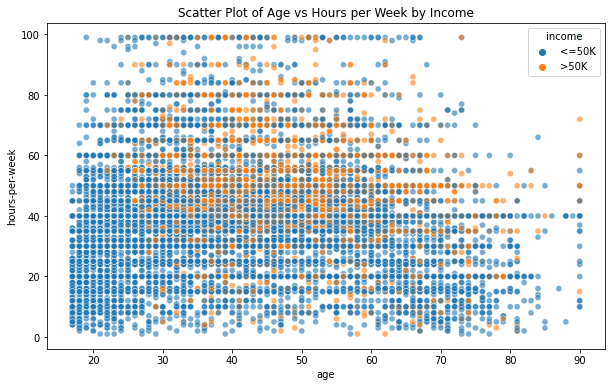

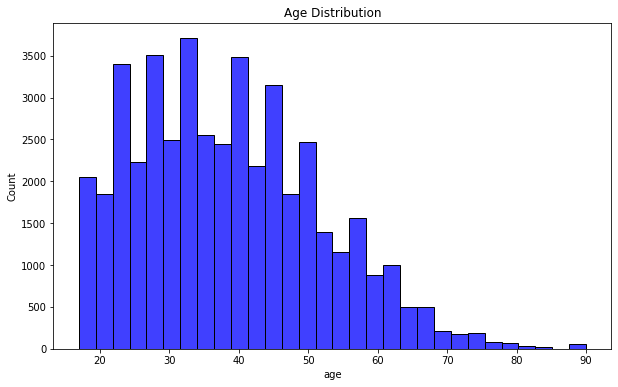

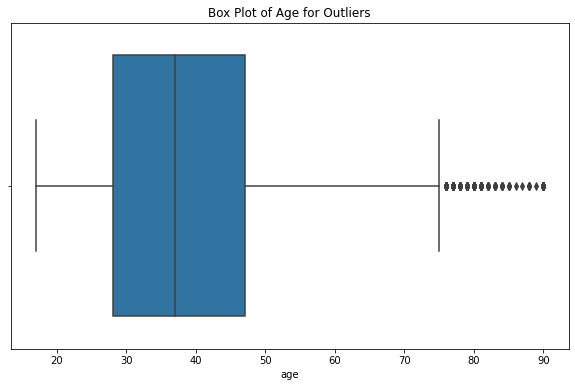

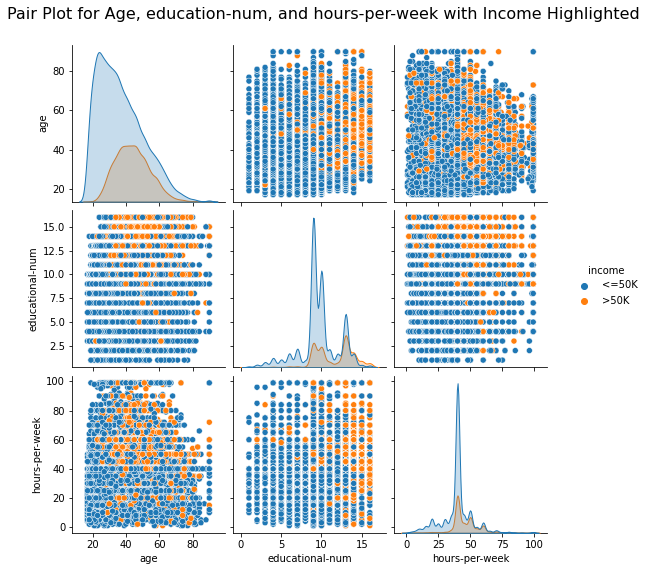

In [6]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income', alpha=0.6)
plt.title('Scatter Plot of Age vs Hours per Week by Income')
plt.show()


# Histogram for distribution of age distribution

# your code here:

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, color='blue')
plt.title('Age Distribution')
plt.show()



# Box plot for age to see outliers

# your code here:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age for Outliers')
plt.show()



# Pair plot for Age, education-num, and hours-per-week

# your code here:

sns.pairplot(df[['age', 'educational-num', 'hours-per-week', 'income']], hue='income')
plt.suptitle('Pair Plot for Age, education-num, and hours-per-week with Income Highlighted', size=16, y=1.05) 
plt.show()


# Encode and Normalize dataset

In [7]:
# Use one-hot endcoding to convert categorical features into numerical format

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
df_encoded = pd.get_dummies(df, columns= categorical_features)

In [8]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()


# your code here:
# Identify numerical columns (this assumes df_encoded still contains numerical columns that need scaling)
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Fit the scaler on the numerical features
scaler.fit(df_encoded[numerical_features])

# Transform the data
df_encoded[numerical_features] = scaler.transform(df_encoded[numerical_features])

In [9]:
numerical_features 

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [10]:
df_encoded.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,1.849945,-0.805664,1.912190,0.266650,-0.21878,-0.744377,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,-1.100639,1.703291,-0.046403,-0.146733,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
9,1.244697,-0.802161,-2.396715,-0.146733,-0.21878,-2.576584,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
10,2.001257,-0.049989,-0.438122,0.708277,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
11,-0.192767,0.215171,1.128753,-0.146733,-0.21878,-0.078120,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Implement PCA from Scratch

In [11]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.

# your code here:

# Center the data by subtracting the mean
X_centered = df_encoded - df_encoded.mean()

# Calculate the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto the first two principal components
n_components = 2
principal_components = sorted_eigenvectors[:, :n_components]
X_pca = np.dot(X_centered, principal_components)




In [ ]:
X_pca

# Visualize the PCA-reduced data

C:\Users\asus\AppData\Local\Temp\ipykernel_1472\519119871.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')


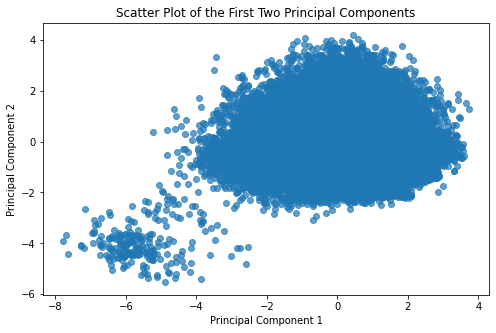

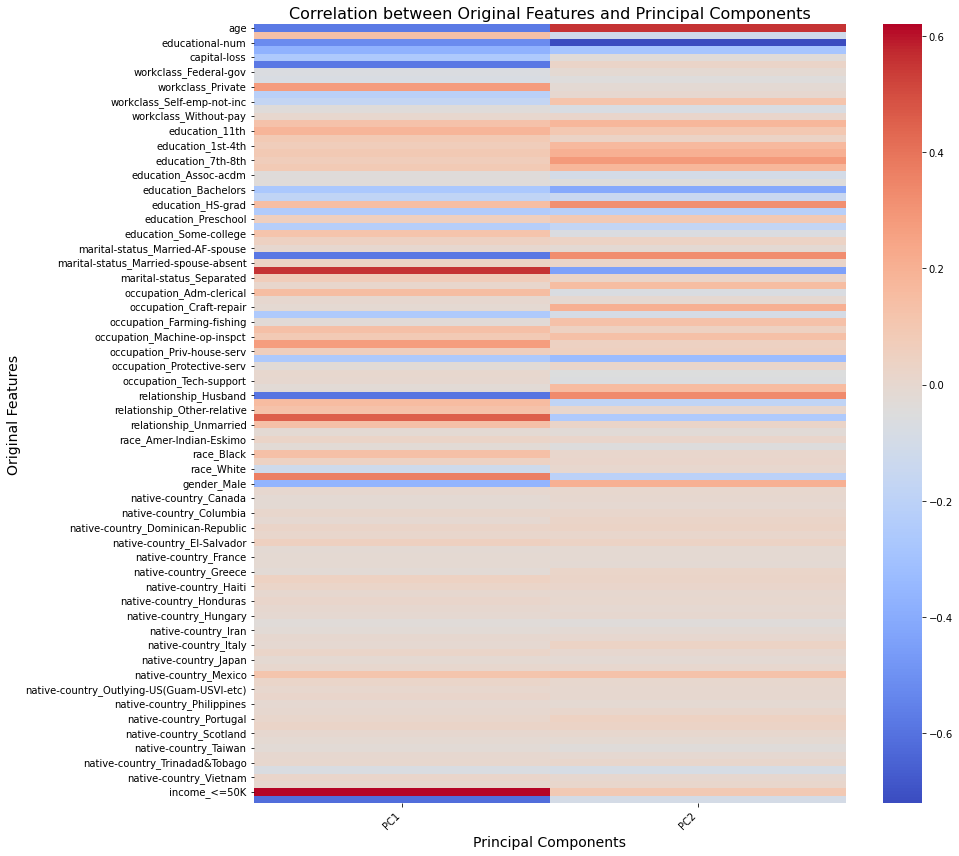

In [12]:
# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

# your code here:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.show()


# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.
original_features = df_encoded.columns  
pca_component_names = ['PC1', 'PC2']
# Combine the original scaled data and PCA result into one DataFrame for correlation analysis
combined_data = np.hstack([df_encoded, X_pca])
# Extract the specific part of the matrix that relates original features to the principal components
combined_df = pd.DataFrame(combined_data, columns=list(original_features) + pca_component_names)

# Compute the correlation matrix
correlation_matrix = combined_df.corr()
correlation_subset = correlation_matrix.loc[original_features, pca_component_names]


plt.figure(figsize=(14, 12)) 
ax = sns.heatmap(correlation_subset, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components', fontsize=16)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Original Features', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()




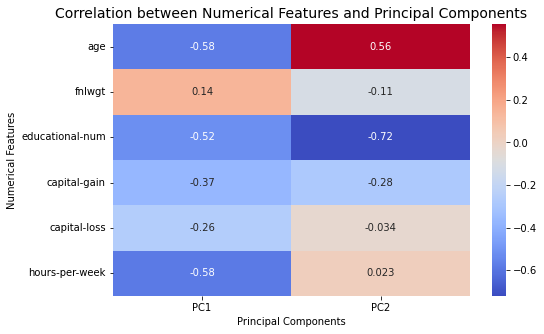

In [13]:
df_numerical = df_encoded[numerical_features]
# Join the PCA components to the DataFrame
df_numerical_pca = df_numerical.join(pd.DataFrame(X_pca, columns=pca_component_names, index=df_numerical.index))
# Compute the correlation matrix between numerical features and PCA components
correlation_matrix = df_numerical_pca.corr().loc[numerical_features, pca_component_names]
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features and Principal Components', fontsize=14)
plt.xlabel('Principal Components')
plt.ylabel('Numerical Features')
plt.show()
